In [33]:
import dill
import pandas as pd
from tqdm import tqdm
import sys
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
import tweepy
import numpy as np
import pyLDAvis.sklearn
import matplotlib.pyplot

import warnings
warnings.filterwarnings('ignore')

sys.path.append('../scripts')

import twitter
import text_analysis

andrew_yang_tweets = dill.load(open('../scrapped_data/twitter-data/yang-tweets.pkd', 'rb'))

# Andrew Yang

In [29]:
hashtags = [tweet.entities['hashtags'] for tweet in andrew_yang_tweets]
hashtag_counts = []

for hashtag_set in hashtags:
    for hashtag in hashtag_set:
        hashtag_counts.append(hashtag['text'])

In [30]:
counts = dict()

for x in set(hashtag_sets):
    counts[x] = hashtag_counts.count(x)

In [31]:
counts = sorted([('#{}'.format(k), v) for k, v in counts.items()], key=lambda x: x[1], reverse=True)
counts = np.array(counts)

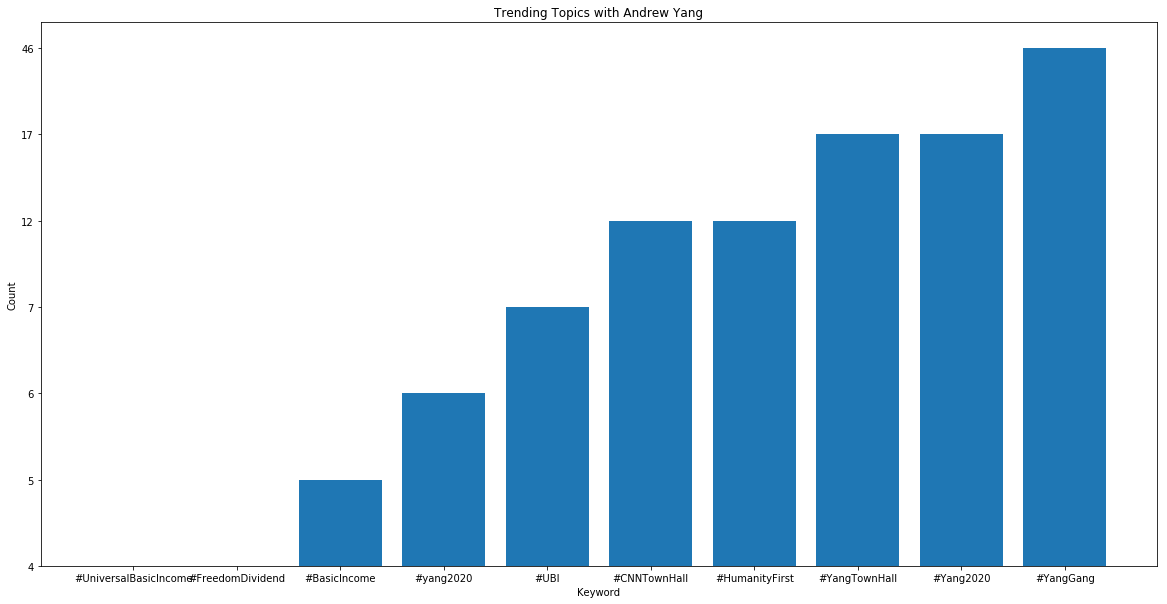

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.bar(counts[:10, 0][::-1], height=counts[:10, 1][::-1])
plt.title("Trending Topics with Andrew Yang")
plt.xlabel("Keyword")
plt.ylabel("Count")
plt.show()

In [34]:
text = twitter.Tweets(andrew_yang_tweets)

text.process_tweets_into_df()
text.clean_column()
text.generate_lda_graph()

100%|██████████| 3199/3199 [00:00<00:00, 3371.98it/s]


PreparedData(topic_coordinates=               x           y  topics  cluster       Freq
topic                                                   
6     -44.701523  -56.828560       1        1  14.753113
1      57.686676 -102.858910       2        1  12.343543
4     -17.134007   -7.133739       3        1  12.256860
7      -1.466564  -46.592525       4        1  11.228132
9       2.810714  -88.209946       5        1  11.186994
2     -36.566196 -106.068001       6        1  10.254486
0      36.692459  -63.666443       7        1   7.725130
8      35.580761  -15.198981       8        1   7.657304
5      76.641563  -49.314659       9        1   6.312497
3      15.483200 -129.539932      10        1   6.281941, topic_info=     Category        Freq           Term       Total  loglift  logprob
term                                                                  
2444  Default  378.000000         thanks  378.000000  30.0000  30.0000
2143  Default  434.000000             rt  434.000000  29.0000  29.0000
2443  Default  311.000000          thank  311.000000  28.0000  28.0000
217   Default  255.000000  andrewyangvfa  255.000000  27.0000  27.0000
1     Default  137.000000            000  137.000000  26.0000  26.0000
2699  Default  137.000000           work  137.000000  25.0000  25.0000
1636  Default   88.000000          month   88.000000  24.0000  24.0000
1326  Default  106.000000            job  106.000000  23.0000  23.0000
1816  Default  277.000000         people  277.000000  22.0000  22.0000
1436  Default  130.000000            let  130.000000  21.0000  21.0000
428   Default  108.000000      candidate  108.000000  20.0000  20.0000
2732  Default   70.000000            yes   70.000000  19.0000  19.0000
39    Default   97.000000           2020   97.000000  18.0000  18.0000
1686  Default  200.000000            new  200.000000  17.0000  17.0000
1090  Default  155.000000          great  155.000000  16.0000  16.0000
1449  Default  124.000000           like  124.000000  15.0000  15.0000
1919  Default   93.000000   presidential   93.000000  14.0000  14.0000
423   Default  131.000000       campaign  131.000000  13.0000  13.0000
2390  Default   68.000000        support   68.000000  12.0000  12.0000
1476  Default   70.000000           love   70.000000  11.0000  11.0000
320   Default  103.000000          basic  103.000000  10.0000  10.0000
1232  Default  111.000000         income  111.000000   9.0000   9.0000
1079  Default   86.000000           good   86.000000   8.0000   8.0000
545   Default  101.000000           come  101.000000   7.0000   7.0000
2729  Default  111.000000           year  111.000000   6.0000   6.0000
1341  Default   64.000000           join   64.000000   5.0000   5.0000
2715  Default   77.000000           yang   77.000000   4.0000   4.0000
1279  Default   76.000000           iowa   76.000000   3.0000   3.0000
1678  Default  133.000000           need  133.000000   2.0000   2.0000
214   Default   71.000000         andrew   71.000000   1.0000   1.0000
...       ...         ...            ...         ...      ...      ...
793   Topic10   10.010875         driver   10.815948   2.6901  -5.0194
1216  Topic10    9.903355      immigrant   10.708376   2.6893  -5.0302
1949  Topic10   13.327541         profit   14.470174   2.6852  -4.7333
559   Topic10    8.810865    competition    9.619423   2.6797  -5.1471
1991  Topic10    8.412862        quality    9.217901   2.6761  -5.1933
1106  Topic10    7.355049            gun    8.160952   2.6635  -5.3277
430   Topic10    6.071981        capable    6.877230   2.6430  -5.5194
1361  Topic10    5.883883   juliancastro    6.689095   2.6392  -5.5509
2082  Topic10    5.690028        respect    6.495195   2.6351  -5.5844
2528  Topic10    5.809555      transform    6.632315   2.6350  -5.5636
1139  Topic10    5.162782       headline    5.969730   2.6223  -5.6816
316   Topic10    4.886533            bar    5.692016   2.6149  -5.7366
2209  Topic10    4.878678  sengillibrand    5.683709   2.6148  -5.7382
2393  T

# Donald Trump

In [19]:
trump_tweets = dill.load(open('../scrapped_data/twitter-data/trump_personal_tweets.pkd', 'rb'))

In [20]:
hashtags = [tweet.entities['hashtags'] for tweet in trump_tweets]
hashtag_counts = []

for hashtag_set in hashtags:
    for hashtag in hashtag_set:
        hashtag_counts.append(hashtag['text'])

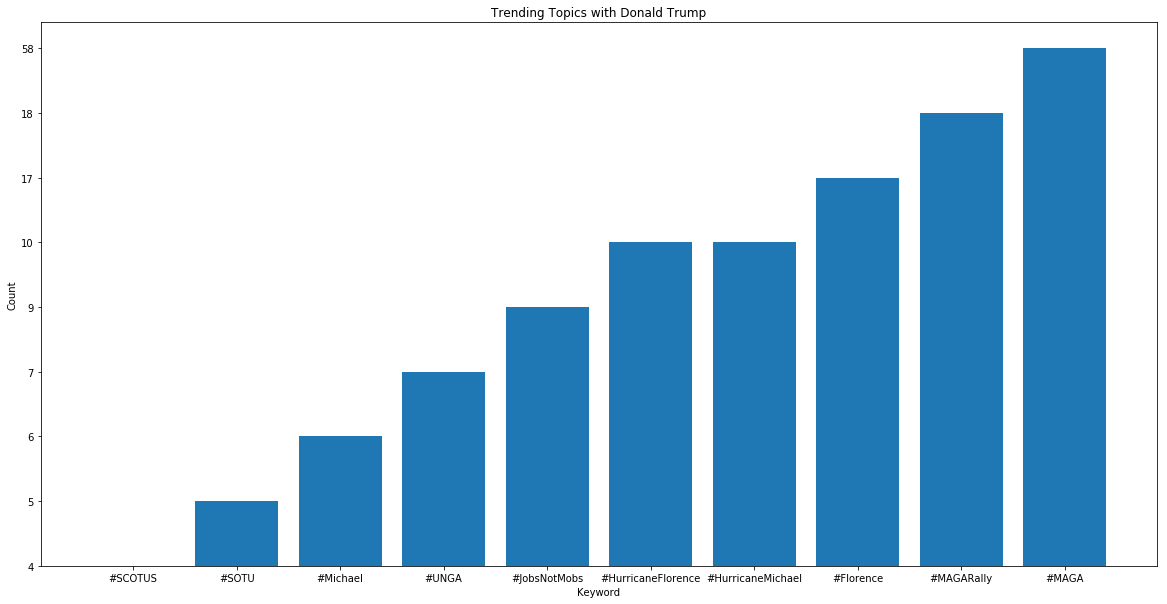

In [21]:
counts = dict()

for x in set(hashtag_counts):
    counts[x] = hashtag_counts.count(x)
    
counts = sorted([('#{}'.format(k), v) for k, v in counts.items()], key=lambda x: x[1], reverse=True)
counts = np.array(counts)

plt.figure(figsize=(20,10))

plt.bar(counts[:10, 0][::-1], height=counts[:10, 1][::-1])
plt.title("Trending Topics with Donald Trump")
plt.xlabel("Keyword")
plt.ylabel("Count")
plt.show()

In [35]:
text = twitter.Tweets(trump_tweets)

text.process_tweets_into_df()
text.clean_column()
text.generate_lda_graph()

100%|██████████| 3192/3192 [00:01<00:00, 1981.92it/s]


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
0       30.174490 -105.021225       1        1  19.773418
6       34.993778  -24.299461       2        1  19.239586
4       98.948952   84.112350       3        1  15.924771
2      -30.089075   23.699591       4        1   9.396106
9      159.214127  -44.608269       5        1   7.355785
3      -31.260393  -55.315891       6        1   7.196124
7       94.131912    3.387493       7        1   6.975299
5      160.384094   34.407684       8        1   5.367966
1       95.681488  -76.923431       9        1   4.747587
8       33.445118   56.009556      10        1   4.023358, topic_info=     Category        Freq             Term       Total  loglift  logprob
term                                                                    
2665  Default  514.000000               rt  514.000000  30.0000  30.0000
1359  Default  666.000000            great  666.000000  29.0000  29.0000
2502  Default  187.000000  realdonaldtrump  187.000000  28.0000  28.0000
2099  Default  221.000000             news  221.000000  27.0000  27.0000
1148  Default  212.000000             fake  212.000000  26.0000  26.0000
218   Default  167.000000         american  167.000000  25.0000  25.0000
3091  Default  108.000000            trade  108.000000  24.0000  24.0000
421   Default  325.000000           border  325.000000  23.0000  23.0000
1169  Default  115.000000              fbi  115.000000  22.0000  22.0000
3240  Default  226.000000             vote  226.000000  21.0000  21.0000
3126  Default  314.000000            trump  314.000000  20.0000  20.0000
3362  Default  234.000000             year  234.000000  19.0000  19.0000
1335  Default  207.000000             good  207.000000  18.0000  18.0000
2376  Default  329.000000        president  329.000000  17.0000  17.0000
2574  Default  148.000000       republican  148.000000  16.0000  16.0000
3035  Default  211.000000            thank  211.000000  15.0000  15.0000
1343  Default   68.000000         governor   68.000000  14.0000  14.0000
2261  Default  120.000000              pay  120.000000  13.0000  13.0000
3067  Default  200.000000             time  200.000000  12.0000  12.0000
3314  Default  131.000000              win  131.000000  11.0000  11.0000
3073  Default  163.000000            today  163.000000  10.0000  10.0000
564   Default   80.000000            china   80.000000   9.0000   9.0000
3173  Default  126.000000           united  126.000000   8.0000   8.0000
2900  Default  121.000000           states  121.000000   7.0000   7.0000
822   Default   96.000000             deal   96.000000   6.0000   6.0000
2897  Default  150.000000            state  150.000000   5.0000   5.0000
1024  Default  112.000000         election  112.000000   4.0000   4.0000
3254  Default  165.000000             wall  165.000000   3.0000   3.0000
1475  Default   79.000000            honor   79.000000   2.0000   2.0000
2096  Default  188.000000              new  188.000000   1.0000   1.0000
...       ...         ...              ...         ...      ...      ...
1347  Topic10    9.860847              gps   10.692883   3.1320  -5.1781
3207  Topic10    9.447236            vegas   10.279085   3.1287  -5.2210
1711  Topic10    9.136012             kemp    9.968591   3.1258  -5.2545
2094  Topic10    8.236969           nevada    9.069003   3.1168  -5.3581
2810  Topic10    7.556167          simpson    8.388071   3.1086  -5.4443
2619  Topic10   13.151464             rick   14.656684   3.1047  -4.8902
3060  Topic10    7.166326          tickets    7.998263   3.1032  -5.4973
2102  Topic10    7.098977              nfl    7.933760   3.1019  -5.5068
2178  Topic10    7.068655          opinion    7.900973   3.1017  -5.5110
2813  Topic10    6.925407           single    7.757461   3.0996  -5.5315
2070  Topic10    6.838702               nc    7.670828   3.0982  -5.5441
449   Topic10   13.977573            brian   15.7

# Bernie Sanders

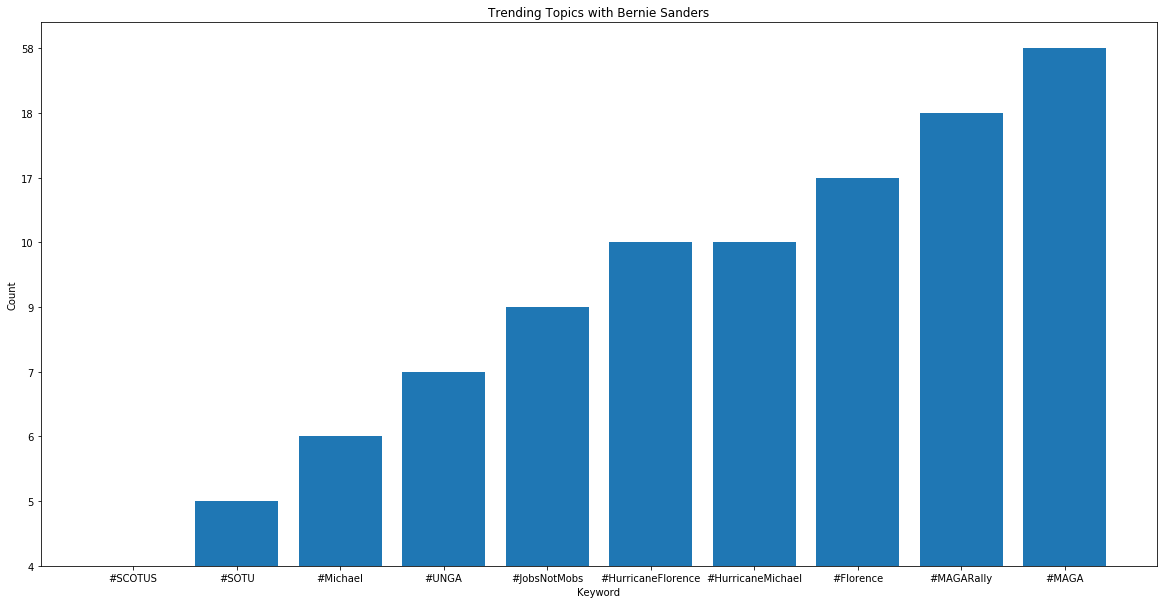

In [37]:
sanders_tweet = dill.load(open('../scrapped_data/twitter-data/sanders-tweets.pkd', 'rb'))

hashtags = [tweet.entities['hashtags'] for tweet in trump_tweets]
hashtag_counts = []

for hashtag_set in hashtags:
    for hashtag in hashtag_set:
        hashtag_counts.append(hashtag['text'])

counts = dict()

for x in set(hashtag_counts):
    counts[x] = hashtag_counts.count(x)
    
counts = sorted([('#{}'.format(k), v) for k, v in counts.items()], key=lambda x: x[1], reverse=True)
counts = np.array(counts)

plt.figure(figsize=(20,10))

plt.bar(counts[:10, 0][::-1], height=counts[:10, 1][::-1])
plt.title("Trending Topics with Bernie Sanders")
plt.xlabel("Keyword")
plt.ylabel("Count")
plt.show()

In [38]:
text = twitter.Tweets(sanders_tweet)

text.process_tweets_into_df()
text.clean_column()
text.generate_lda_graph()

100%|██████████| 3199/3199 [00:01<00:00, 2430.68it/s]


PreparedData(topic_coordinates=                x          y  topics  cluster       Freq
topic                                                   
8      -63.853958 -97.968315       1        1  15.538984
4      -86.133591  20.769152       2        1  14.724669
3      -66.894760 -36.618740       3        1  12.081194
2     -148.690369  20.662748       4        1  12.051465
6      -94.242798  82.779671       5        1  10.112862
5       34.374340  13.753974       6        1  10.017102
9     -129.947067 -49.053017       7        1   8.959877
0        0.721722 -55.786259       8        1   7.088926
7      -22.677696  72.884201       9        1   5.753883
1      -26.825224   8.682805      10        1   3.671037, topic_info=     Category        Freq           Term       Total  loglift  logprob
term                                                                  
2288  Default  669.000000             rt  669.000000  30.0000  30.0000
1266  Default  503.000000         health  503.000000  29.0000  29.0000
2383  Default  323.000000     sensanders  323.000000  28.0000  28.0000
463   Default  444.000000           care  444.000000  27.0000  27.0000
2221  Default  351.000000     republican  351.000000  26.0000  26.0000
2596  Default  334.000000            tax  334.000000  25.0000  25.0000
2844  Default  157.000000            war  157.000000  24.0000  24.0000
1670  Default  181.000000       medicare  181.000000  23.0000  23.0000
2835  Default  176.000000           wage  176.000000  22.0000  22.0000
2896  Default  220.000000         worker  220.000000  21.0000  21.0000
1698  Default  260.000000        million  260.000000  20.0000  20.0000
2708  Default  535.000000          trump  535.000000  19.0000  19.0000
2316  Default  132.000000        sanders  132.000000  18.0000  18.0000
350   Default  109.000000         bernie  109.000000  17.0000  17.0000
496   Default  125.000000         change  125.000000  16.0000  16.0000
235   Default  459.000000       american  459.000000  15.0000  15.0000
1934  Default  462.000000         people  462.000000  14.0000  14.0000
2671  Default  102.000000           town  102.000000  13.0000  13.0000
2895  Default  254.000000           work  254.000000  12.0000  12.0000
1242  Default  101.000000           hall  101.000000  11.0000  11.0000
2824  Default  138.000000           vote  138.000000  10.0000  10.0000
539   Default  107.000000        climate  107.000000   9.0000   9.0000
2481  Default   77.000000          spend   77.000000   8.0000   8.0000
1483  Default  120.000000           join  120.000000   7.0000   7.0000
2360  Default  127.000000         senate  127.000000   6.0000   6.0000
1591  Default  298.000000           live  298.000000   5.0000   5.0000
2026  Default  213.000000      president  213.000000   4.0000   4.0000
1925  Default  220.000000            pay  220.000000   3.0000   3.0000
2592  Default  107.000000           talk  107.000000   2.0000   2.0000
364   Default  152.000000        billion  152.000000   1.0000   1.0000
...       ...         ...            ...         ...      ...      ...
648   Topic10   16.206116   conversation   17.072767   3.2526  -4.5614
494   Topic10   15.475048      challenge   16.338397   3.2504  -4.6076
530   Topic10   12.365628           city   13.229623   3.2372  -4.8319
1657  Topic10   23.733659      mcconnell   25.493722   3.2332  -4.1799
1402  Topic10   11.625278    information   12.488525   3.2331  -4.8936
354   Topic10   10.925890  berniesanders   11.789194   3.2286  -4.9556
1322  Topic10   10.542377      household   11.405638   3.2260  -4.9914
1715  Topic10   14.178836          mitch   15.386292   3.2230  -4.6950
1068  Topic10    9.450078           fall   10.313278   3.2173  -5.1008
1383  Topic10    9.238970     incredibly   10.129343   3.2127  -5.1234
740   Topic10    8.748447       deadline    9.611686   3.2106  -5.1779
115   Topic10    8.607781             87    9.478183   3.2084  -5.1941
1244  Topic10    8.504429           hand    9.367756   3.2080  -5.2062
1484  T